#### Relationship between soil moisture difference and P/P-E stratified by classification of intial soil moisture levels
##### Primary analysis using soil-moisture classified by initial soil moisture levels (also season?)
##### To do: think about whether it makes sense to use soil mositure classifications similar to what BoM uses to identify drought
##### In this case, it will be feasible to subset soil moisture conditions corresponding to actual "droughts" and use them for fitting the relationship

In [1]:
%who

Interactive namespace is empty.


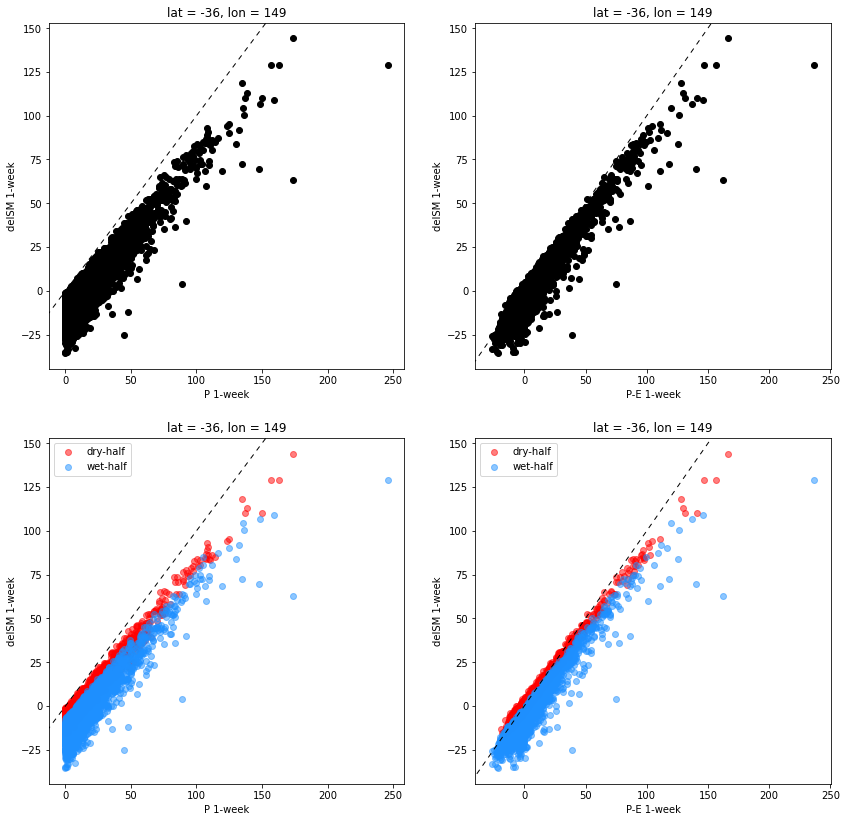

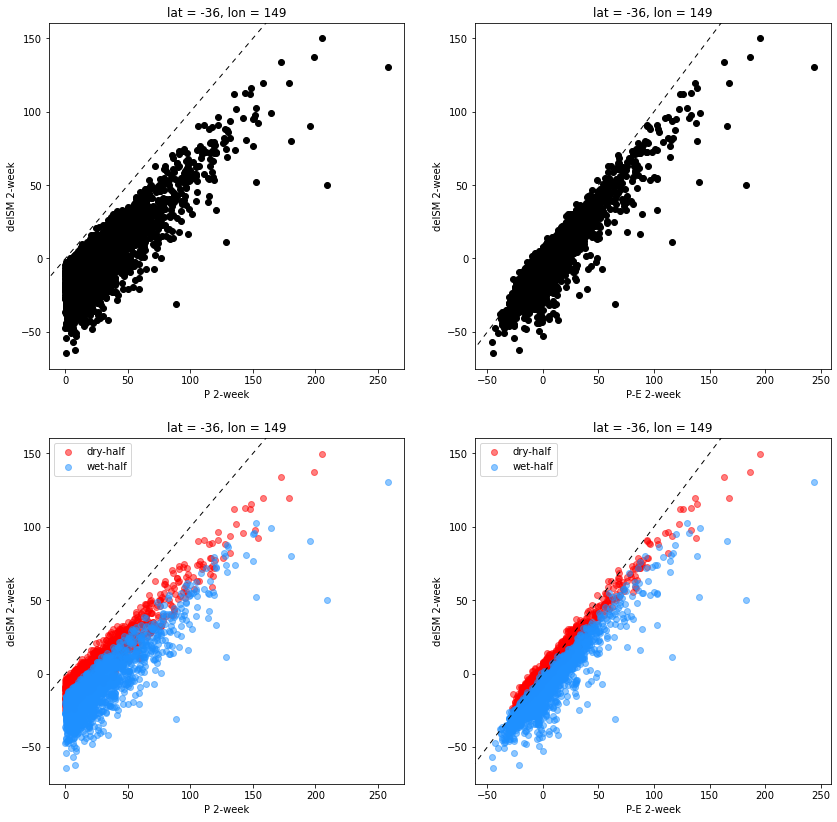

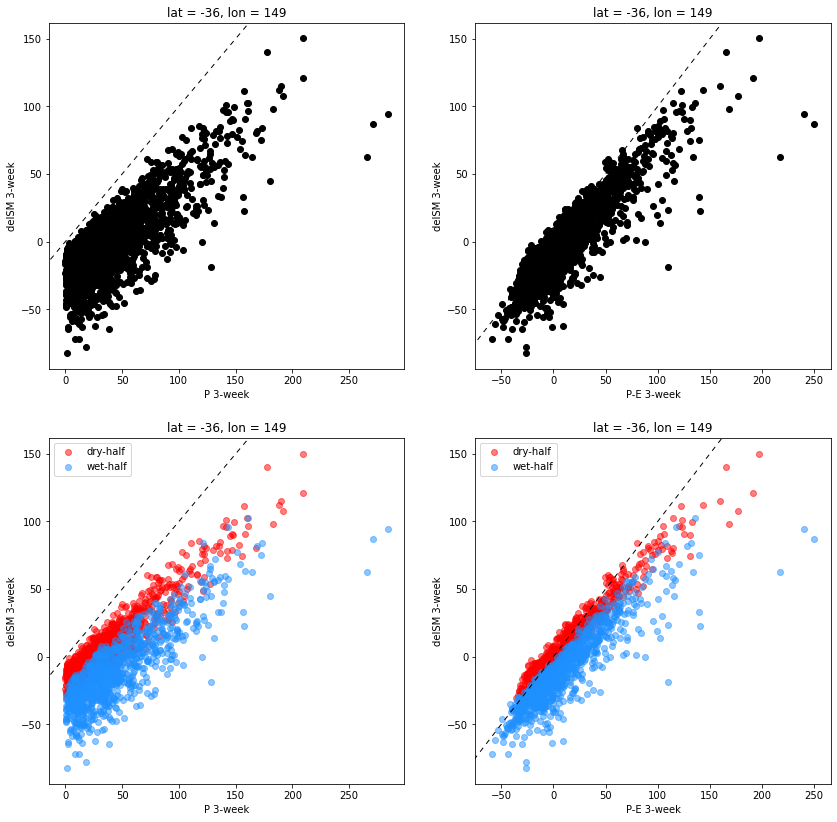

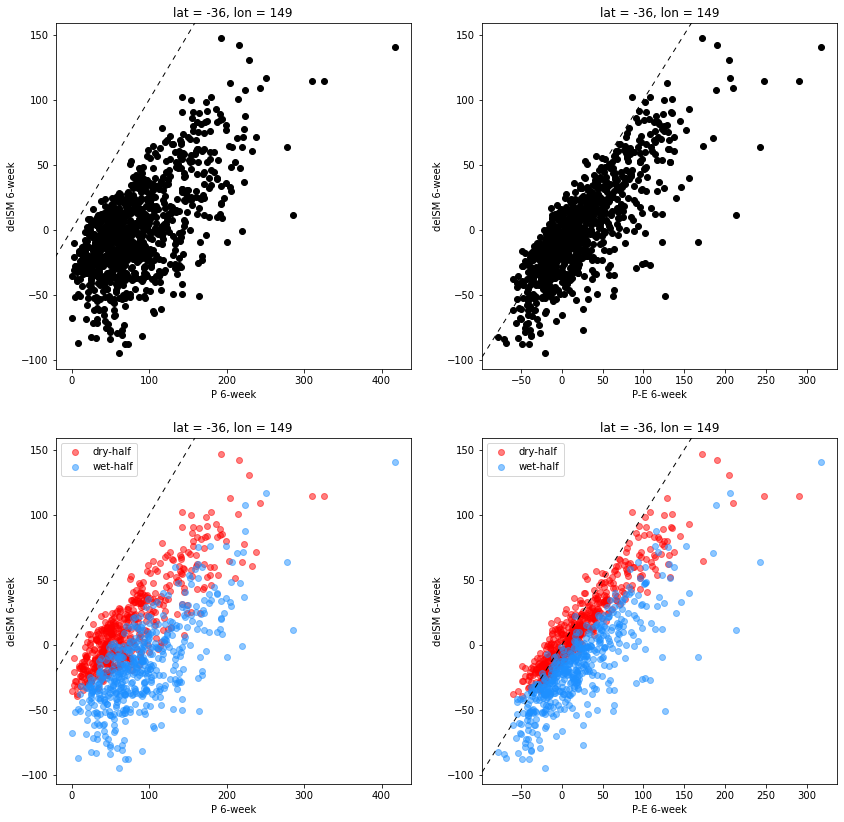

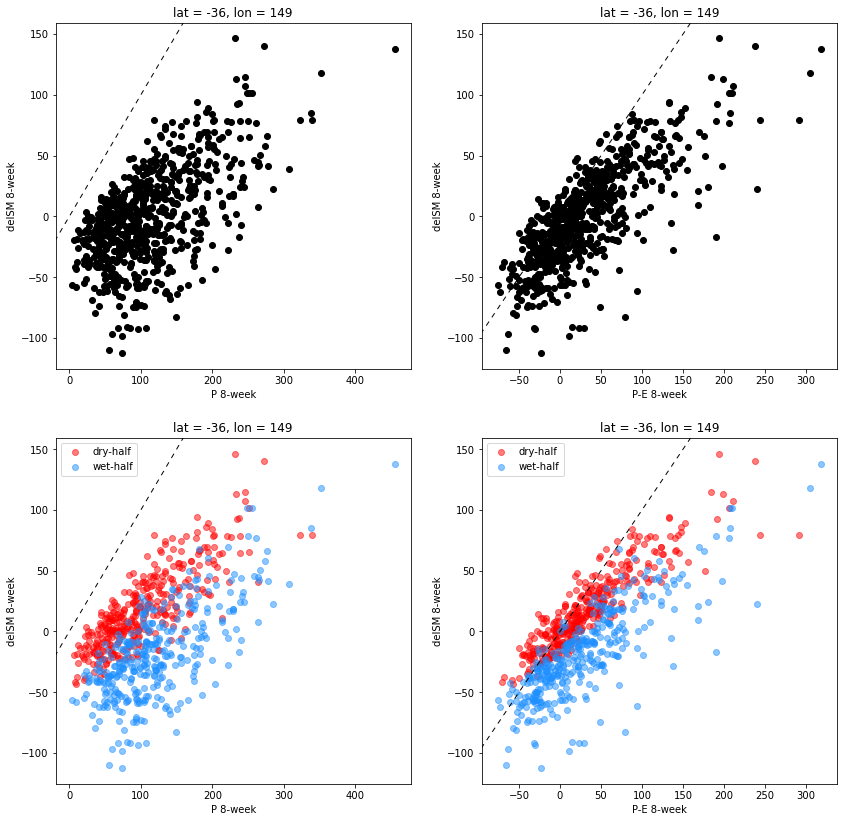

In [3]:
# cell creates scatter plots of SM vs. P and SM vs. P-E at various time frames for the selected grid point

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

outdir = 'figures/SM_P_PmE_scatter/'
#out_dir = '/g/data/w97/ad9701/p_prob_analysis/temp_files/sm_P_PminusE_eqns/'

########## Add more when calculated #########
multiweek = np.array([1, 2, 3, 6, 8])
#############################################

fname_sm_init = 'sm_init_*_SEA_*.nc'
fname_sm_diff = 'sm_diff_*_SEA_*.nc'
fname_P = 'P_*_SEA_*.nc'
fname_PmE = 'PminusE_*_SEA_*.nc'

lat_pt = -36 #-37
lon_pt = 149 #148

def abline(slope, intercept, axes):
    """Plot a line from slope and intercept"""
    axes_xlim = axes.get_xlim()
    axes_ylim = axes.get_ylim()
    x_vals = np.append(np.append(np.array(axes_xlim[0]-500), np.array(axes.get_xlim())), np.array(axes_xlim[1]+500))
    y_vals = intercept + slope * x_vals
    axes.plot(x_vals, y_vals, linestyle=(0,(5,5)), color="black", linewidth=1)
    axes.set(xlim = axes_xlim, ylim = axes_ylim)

for iW in multiweek:
    
    figname = 'lat' + str(lat_pt) + '_lon' + str(lon_pt) + '_SM_vs_P_and_PmE_week' + str(iW) + '.png'
    
    data_dir_P = '/g/data/w97/ad9701/p_prob_analysis/temp_files/P_week'+str(iW)+'/'
    ds_P = xr.open_mfdataset(data_dir_P + fname_P, chunks = {'lat':400, 'lon':400}) #, combine='nested', concat_dim='time', chunks={'lat':1,'lon':1})
    
    data_dir_PmE = '/g/data/w97/ad9701/p_prob_analysis/temp_files/PminusE_week'+str(iW)+'/'
    ds_PmE = xr.open_mfdataset(data_dir_PmE + fname_PmE, chunks = {'lat':400, 'lon':400})
    
    data_dir_sm = '/g/data/w97/ad9701/p_prob_analysis/temp_files/sm_week'+str(iW)+'/'
    ds_sm_init = xr.open_mfdataset(data_dir_sm + fname_sm_init, chunks = {'lat':400, 'lon':400})
    ds_sm_diff = xr.open_mfdataset(data_dir_sm + fname_sm_diff, chunks = {'lat':400, 'lon':400})
    
    da_P_pt = ds_P['precip'].sel(lat = lat_pt, lon = lon_pt, method = "nearest").load()
    da_PmE_pt = ds_PmE['PminusE'].sel(lat = lat_pt, lon = lon_pt, method = "nearest").load()
    da_sm_init_pt = ds_sm_init['sm'].sel(lat = lat_pt, lon = lon_pt, method = "nearest").load()
    da_sm_diff_pt = ds_sm_diff['sm_diff'].sel(lat = lat_pt, lon = lon_pt, method = "nearest").load()
    
    sm_init_median = np.median(da_sm_init_pt.values)
    
    fig, axs = plt.subplots(2,2, figsize=(14, 14))
    axs=axs.flatten()

    colorSel = "black"
    data_x = [da_P_pt, da_PmE_pt]
    data_y = [da_sm_diff_pt, da_sm_diff_pt]

    titleText = 'lat = ' + str(lat_pt) + ', lon = ' + str(lon_pt)
    xlab_list = ['P ' + str(iW) + '-week', 'P-E ' + str(iW) + '-week']
    ylab_list = ['delSM ' + str(iW) + '-week', 'delSM ' + str(iW) + '-week']

    axs[0].scatter(data_x[0], data_y[0], color = colorSel, marker = "o")
    axs[0].set(title = titleText, xlabel = xlab_list[0], ylabel = ylab_list[0])
    abline(1,0, axs[0])
    
    axs[1].scatter(data_x[1], data_y[1], color = colorSel, marker = "o")
    axs[1].set(title = titleText, xlabel = xlab_list[1], ylabel = ylab_list[1])
    abline(1,0, axs[1])

    #Is the relationship during wetter initial conditions very different from the drier initial conditions?
    wetInd = (da_sm_init_pt>sm_init_median).values
    dryInd = (da_sm_init_pt<=sm_init_median).values

    ind_list = [dryInd, wetInd]
    colors = ['red', 'dodgerblue']
    groups = ['dry-half', 'wet-half']

    for x, y, color, group, ind in zip(data_x, data_y, colors, groups, ind_list):
         axs[2].scatter(data_x[0][ind], data_y[0][ind], color = color, label = group, marker = "o", alpha =0.5) #, capsize = 5)
    axs[2].set(title = titleText, xlabel = xlab_list[0], ylabel = ylab_list[0])
    abline(1,0, axs[2])

    for x, y, color, group, ind in zip(data_x, data_y, colors, groups, ind_list):
         axs[3].scatter(data_x[1][ind], data_y[1][ind], color = color, label = group, marker = "o", alpha = 0.5) #, capsize = 5)
    axs[3].set(title = titleText, xlabel = xlab_list[1], ylabel = ylab_list[1])
    abline(1,0,axs[3])

    for i in [2, 3]:
        legend = axs[i].legend(loc='upper left')
        
    plt.savefig(outdir+figname)

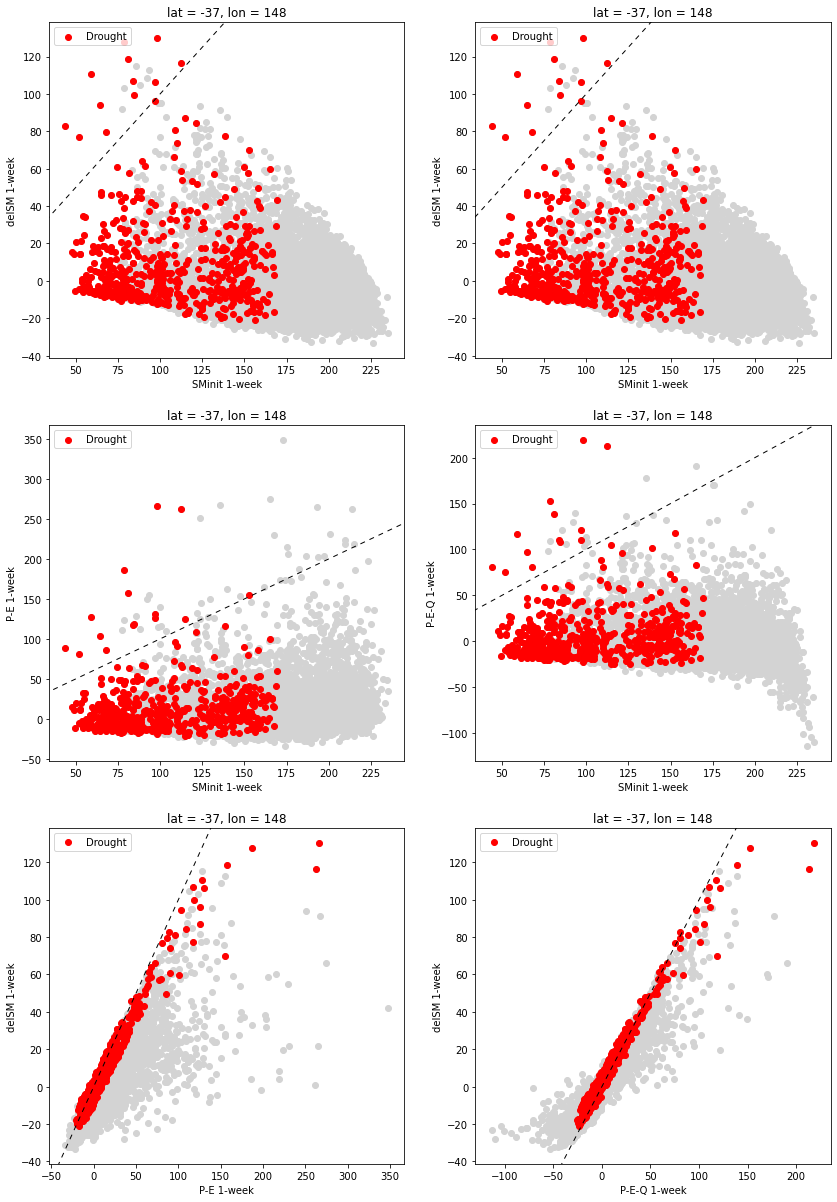

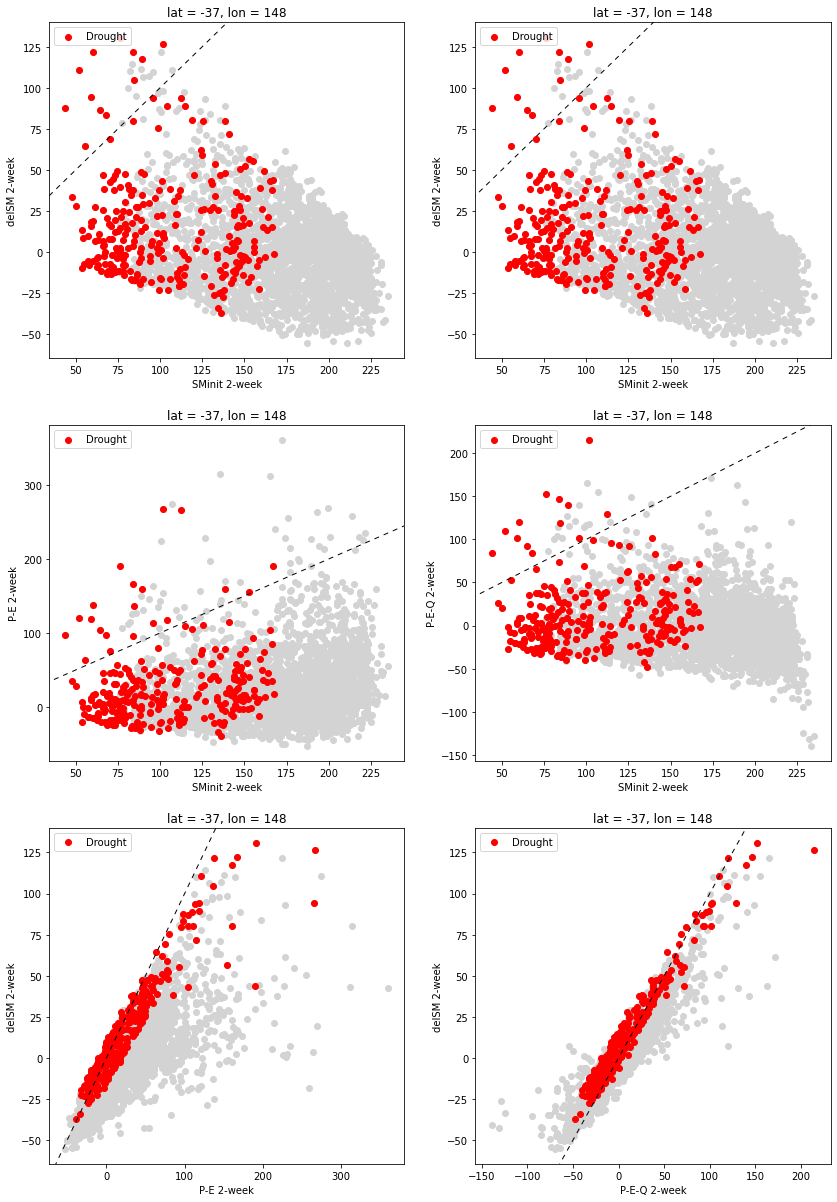

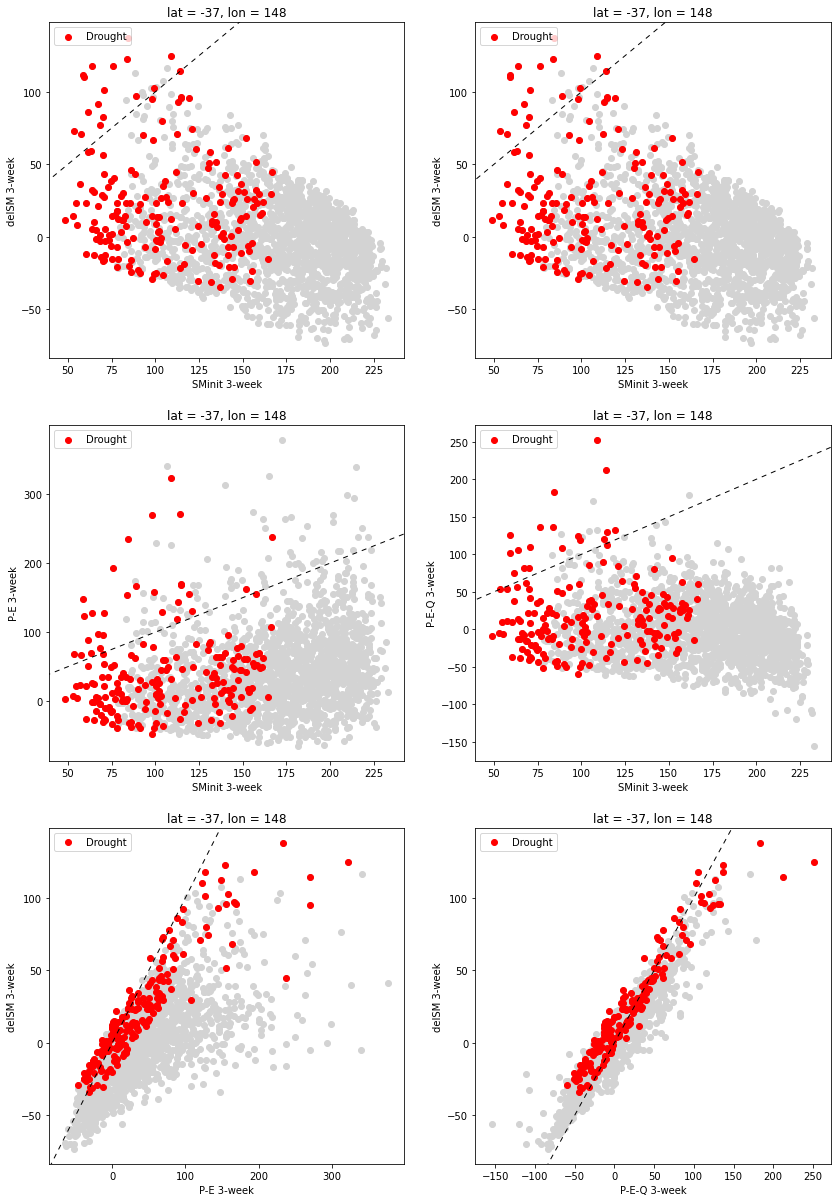

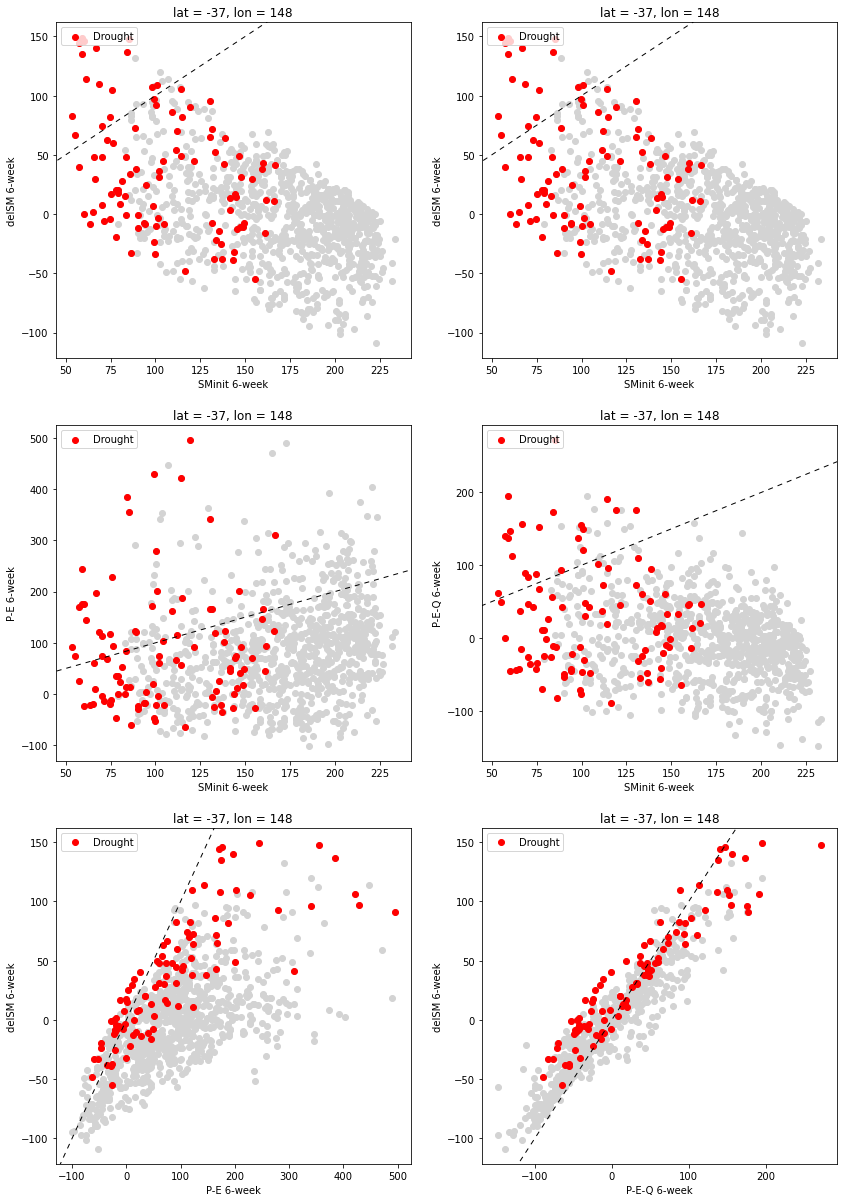

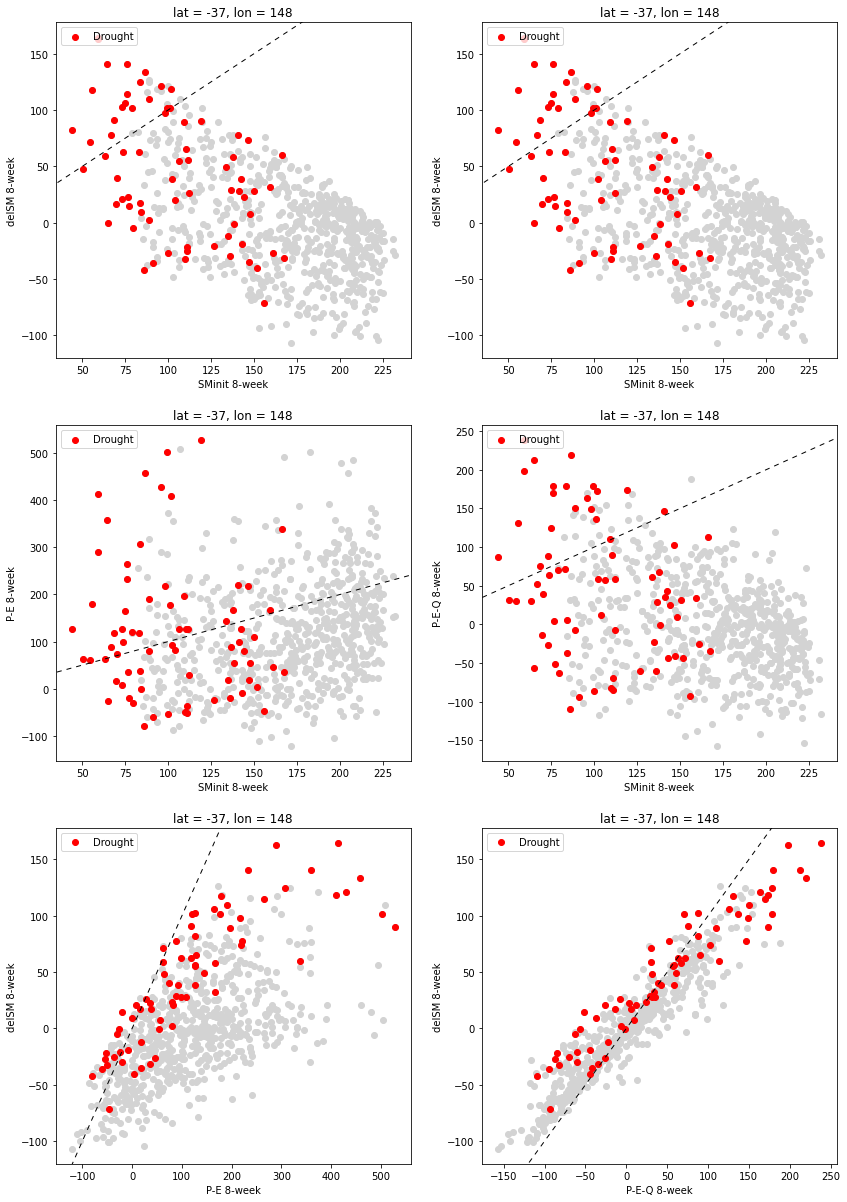

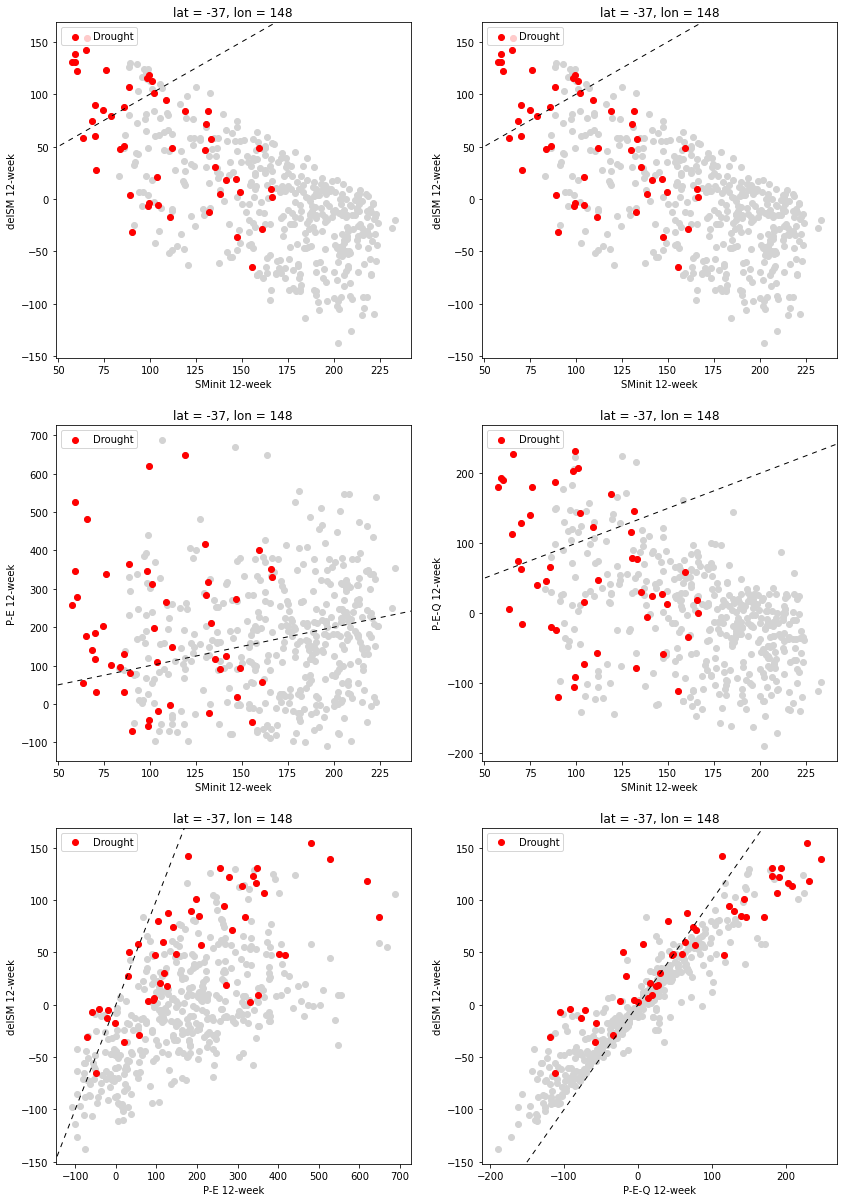

In [6]:
# Is the relationship stronger in cases where the initial soil moisture is classified as serious or severe deficiency (i.e., drought?). 
# The would be below the 10 percentile thershold of long-term sm


import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

outdir = 'figures/SM_P_PmE_PmEQ_scatter/'
#out_dir = '/g/data/w97/ad9701/p_prob_analysis/temp_files/sm_P_PminusE_eqns/'

########## Add more when calculated #########
multiweek = np.array([1, 2, 3, 6, 8, 12])
#############################################

fname_sm_init = 'sm_init_*_SEA_*.nc'
fname_sm_diff = 'sm_diff_*_SEA_*.nc'
fname_PmEQ = 'PminusEQ_*_SEA_*.nc'
fname_PmE = 'PminusE_*_SEA_*.nc'

lat_pt = -37 #-37
lon_pt = 148 #148

def abline(slope, intercept, axes):
    """Plot a line from slope and intercept"""
    axes_xlim = axes.get_xlim()
    axes_ylim = axes.get_ylim()
    x_vals = np.append(np.append(np.array(axes_xlim[0]-500), np.array(axes.get_xlim())), np.array(axes_xlim[1]+500))
    y_vals = intercept + slope * x_vals
    axes.plot(x_vals, y_vals, linestyle=(0,(5,5)), color="black", linewidth=1)
    axes.set(xlim = axes_xlim, ylim = axes_ylim)

for iW in multiweek:
    
    figname = 'lat' + str(lat_pt) + '_lon' + str(lon_pt) + '_SM_vs_PmEQ_and_PmE_week' + str(iW) + '_droughtPts.png'
    
    data_dir_PmEQ = '/g/data/w97/ad9701/p_prob_analysis/temp_files/PminusEQ_week'+str(iW)+'/'
    ds_PmEQ = xr.open_mfdataset(data_dir_PmEQ + fname_PmEQ, chunks = {'lat':400, 'lon':400}) #, combine='nested', concat_dim='time', chunks={'lat':1,'lon':1})
    
    data_dir_PmE = '/g/data/w97/ad9701/p_prob_analysis/temp_files/PminusE_week'+str(iW)+'/'
    ds_PmE = xr.open_mfdataset(data_dir_PmE + fname_PmE, chunks = {'lat':400, 'lon':400})
    
    data_dir_sm = '/g/data/w97/ad9701/p_prob_analysis/temp_files/sm_week'+str(iW)+'/'
    ds_sm_init = xr.open_mfdataset(data_dir_sm + fname_sm_init, chunks = {'lat':400, 'lon':400})
    ds_sm_diff = xr.open_mfdataset(data_dir_sm + fname_sm_diff, chunks = {'lat':400, 'lon':400})
    
    da_PmEQ_pt = ds_PmEQ['PminusEQ'].sel(lat = lat_pt, lon = lon_pt, method = "nearest").load()
    da_PmE_pt = ds_PmE['PminusE'].sel(lat = lat_pt, lon = lon_pt, method = "nearest").load()
    da_sm_init_pt = ds_sm_init['sm'].sel(lat = lat_pt, lon = lon_pt, method = "nearest").load()
    da_sm_diff_pt = ds_sm_diff['sm_diff'].sel(lat = lat_pt, lon = lon_pt, method = "nearest").load()
    
    ds_sm_perc = xr.open_dataset('/g/data/w97/ad9701/p_prob_analysis/temp_files/sm_refPeriod_perc/sm_191101_to_202005_perc.nc')
    da_sm_10perc_pt = ds_sm_perc['sm'].sel(lat = lat_pt, lon = lon_pt, method = "nearest").sel(quantile = 0.1).load()
    
    # day of year is not properly assigned in the dataset of percentiles; reassigning
    dayofyear = np.arange(366)+1
    da_sm_perc10_pt = da_sm_10perc_pt.assign_coords(dayofyear = dayofyear)
    
    # get the corresponding 10th perc thershold for each day in the init sm dataset
    da_sm_init_perc10_pt = da_sm_perc10_pt.sel(dayofyear = da_sm_init_pt['time.dayofyear'])
    
    # Is the relationship during drought conditions very different from the non-drought initial conditions?
    droughtInd = (da_sm_init_pt<=da_sm_init_perc10_pt).values
    
    fig, axs = plt.subplots(3,2, figsize=(14, 21))
    axs = axs.flatten()

    colorSel = "lightgrey"
    colourDrght = "red"

    data_x = [da_sm_init_pt, da_sm_init_pt, da_sm_init_pt, da_sm_init_pt, da_PmE_pt, da_PmEQ_pt]
    data_y = [da_sm_diff_pt, da_sm_diff_pt, da_PmE_pt, da_PmEQ_pt, da_sm_diff_pt, da_sm_diff_pt]

    titleText = 'lat = ' + str(lat_pt) + ', lon = ' + str(lon_pt)
    xlab_list = ['SMinit ' + str(iW) + '-week', 'SMinit ' + str(iW) + '-week',\
                 'SMinit ' + str(iW) + '-week', 'SMinit ' + str(iW) + '-week',\
                 'P-E ' + str(iW) + '-week', 'P-E-Q ' + str(iW) + '-week']
    ylab_list = ['delSM ' + str(iW) + '-week', 'delSM ' + str(iW) + '-week',\
                 'P-E ' + str(iW) + '-week', 'P-E-Q ' + str(iW) + '-week',\
                 'delSM ' + str(iW) + '-week', 'delSM ' + str(iW) + '-week']

    for iX in np.arange(6):
        axs[iX].scatter(data_x[iX], data_y[iX], color = colorSel, marker = "o")
        axs[iX].scatter(data_x[iX][droughtInd], data_y[iX][droughtInd], color = colourDrght, label = "Drought", marker = "o") #, alpha =0.5) #, capsize = 5)
        axs[iX].set(title = titleText, xlabel = xlab_list[iX], ylabel = ylab_list[iX])
        abline(1,0, axs[iX])
        legend = axs[iX].legend(loc='upper left')
    
#     axs[1].scatter(data_x[1], data_y[1], color = colorSel, marker = "o")
#     axs[1].scatter(data_x[1][droughtInd], data_y[1][droughtInd], color = colourDrght, label = "Drought", marker = "o") #, alpha =0.5) #, capsize = 5)
#     axs[1].set(title = titleText, xlabel = xlab_list[1], ylabel = ylab_list[1])
#     abline(1,0, axs[1])
    
#     for i in [0, 1]:
#         legend = axs[i].legend(loc='upper left')
        
    plt.savefig(outdir+figname)

 

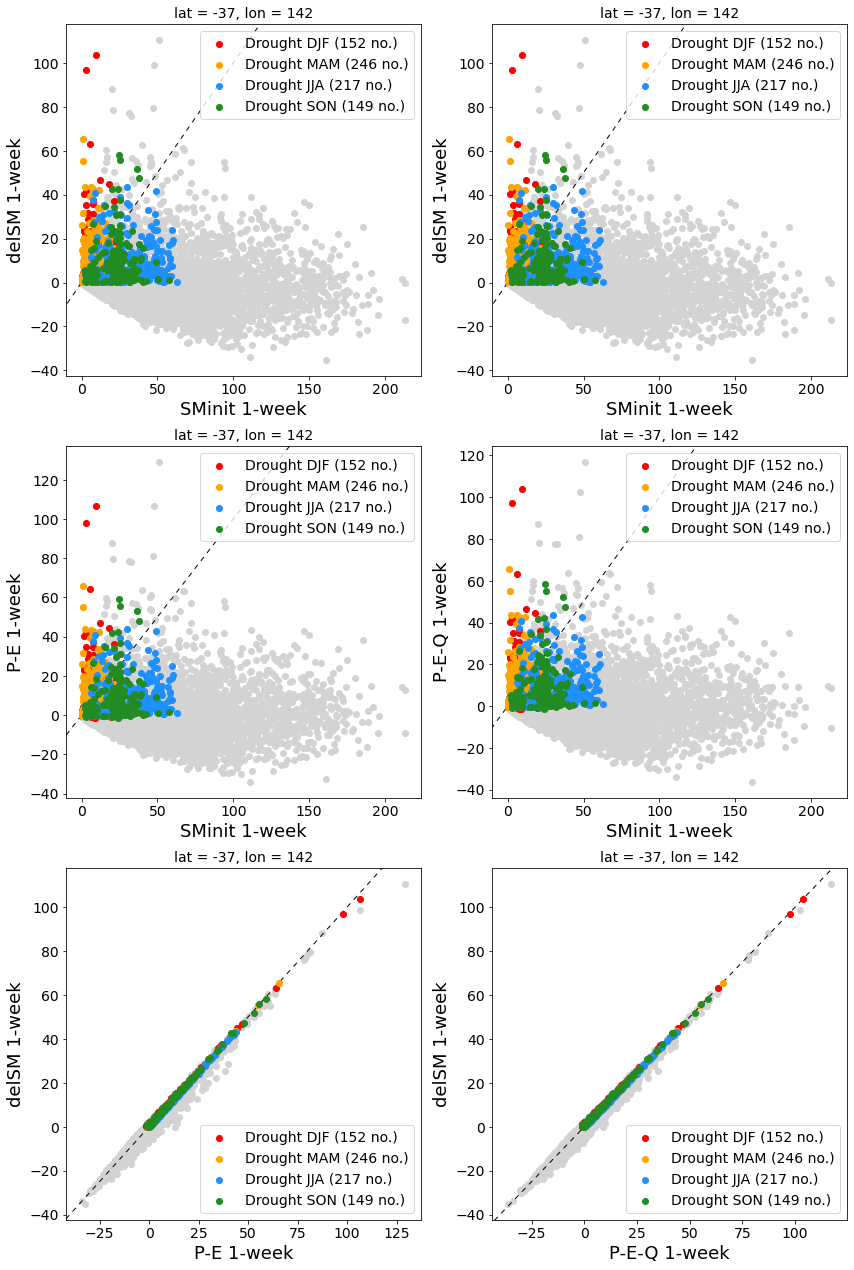

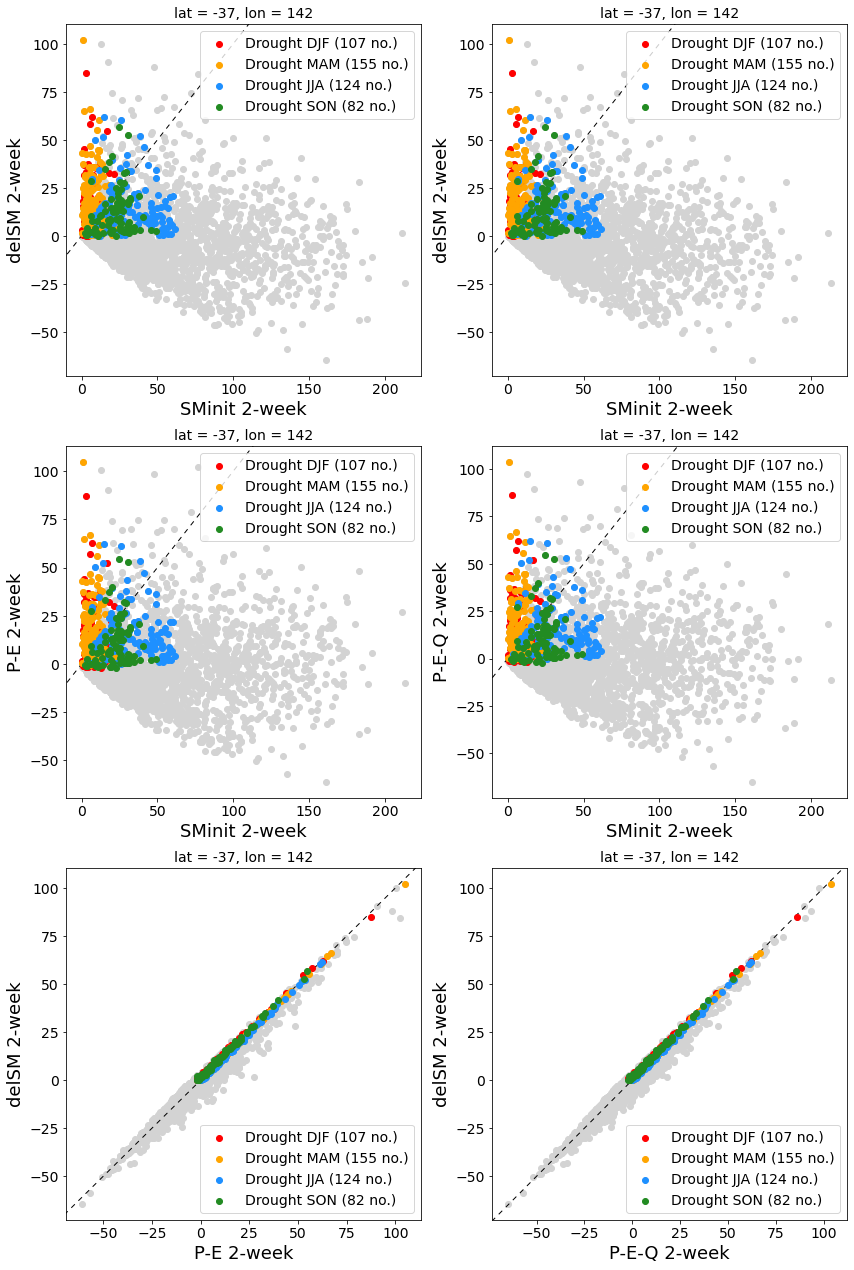

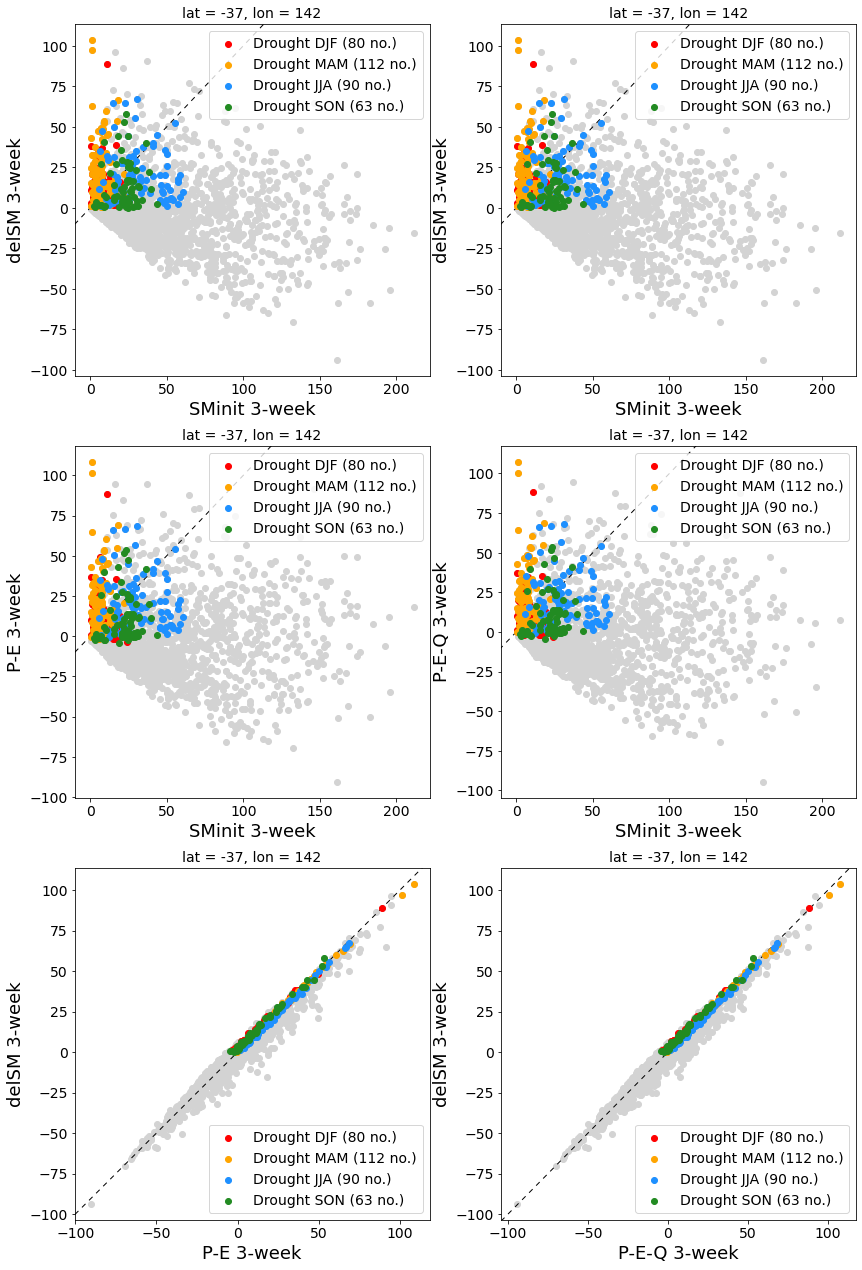

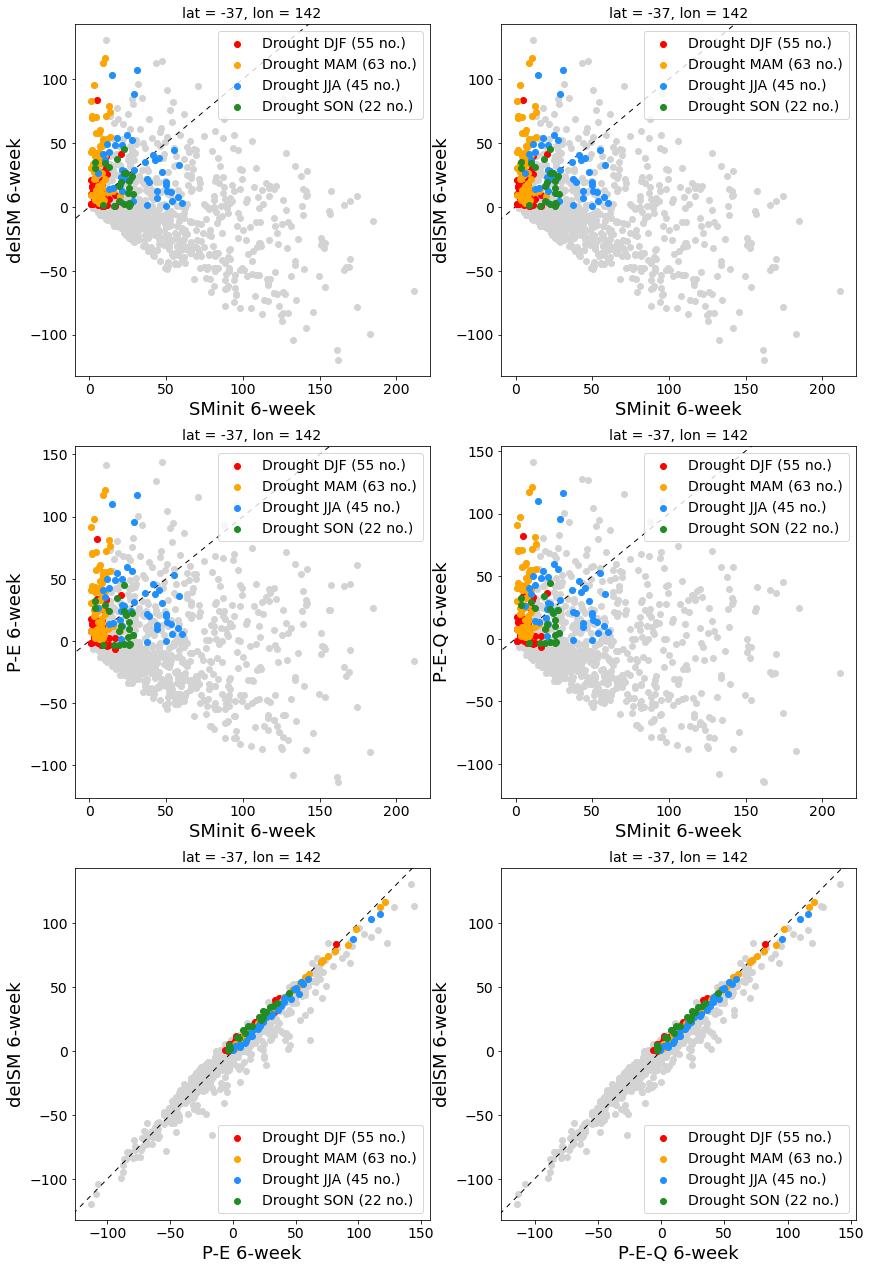

In [ ]:
# Does the above relationship change with season?
# Is the relationship stronger in cases where the initial soil moisture is classified as serious or severe deficiency (i.e., drought?). 
# The would be below the 10 percentile thershold of long-term sm
# Can I use a higher threshold of 30th percentile to look at this relationship?
# I need to exclude data points with a negative soil moisture change as the relationship is only about positive changes in SM
#-------------------------------------------------------------------------
# Note: I changed the code to use the 30th perc. Change back if needed
#-------------------------------------------------------------------------

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

outdir = 'figures/SM_P_PmE_PmEQ_scatter/'
#out_dir = '/g/data/w97/ad9701/p_prob_analysis/temp_files/sm_P_PminusE_eqns/'

########## Add more when calculated #########
multiweek = np.array([1, 2, 3, 6, 8, 12])
#############################################

fname_sm_init = 'sm_init_*_SEA_*.nc'
fname_sm_diff = 'sm_diff_*_SEA_*.nc'
fname_PmEQ = 'PminusEQ_*_SEA_*.nc'
fname_PmE = 'PminusE_*_SEA_*.nc'

lat_pt = -37 #-37
lon_pt = 142 #147

def abline(slope, intercept, axes):
    """Plot a line from slope and intercept"""
    axes_xlim = axes.get_xlim()
    axes_ylim = axes.get_ylim()
    x_vals = np.append(np.append(np.array(axes_xlim[0]-500), np.array(axes.get_xlim())), np.array(axes_xlim[1]+500))
    y_vals = intercept + slope * x_vals
    axes.plot(x_vals, y_vals, linestyle=(0,(5,5)), color="black", linewidth=1)
    axes.set(xlim = axes_xlim, ylim = axes_ylim)
    
seas_names = ['DJF', 'MAM', 'JJA', 'SON']
seas_col = {'DJF':'red', 'MAM':'orange', 'JJA':'dodgerblue', 'SON':'forestgreen'}

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


for iW in multiweek:
    
    figname = 'lat' + str(lat_pt) + '_lon' + str(lon_pt) + '_SM_vs_PmEQ_and_PmE_week' + str(iW) + '_droughtPts_bySeason_30pThresh.png'
    
    data_dir_PmEQ = '/g/data/w97/ad9701/p_prob_analysis/temp_files/PminusEQ_week'+str(iW)+'/'
    ds_PmEQ = xr.open_mfdataset(data_dir_PmEQ + fname_PmEQ, chunks = {'lat':400, 'lon':400}) #, combine='nested', concat_dim='time', chunks={'lat':1,'lon':1})
    
    data_dir_PmE = '/g/data/w97/ad9701/p_prob_analysis/temp_files/PminusE_week'+str(iW)+'/'
    ds_PmE = xr.open_mfdataset(data_dir_PmE + fname_PmE, chunks = {'lat':400, 'lon':400})
    
    data_dir_sm = '/g/data/w97/ad9701/p_prob_analysis/temp_files/sm_week'+str(iW)+'/'
    ds_sm_init = xr.open_mfdataset(data_dir_sm + fname_sm_init, chunks = {'lat':400, 'lon':400})
    ds_sm_diff = xr.open_mfdataset(data_dir_sm + fname_sm_diff, chunks = {'lat':400, 'lon':400})
    
    da_PmEQ_pt_temp = ds_PmEQ['PminusEQ'].sel(lat = lat_pt, lon = lon_pt, method = "nearest").load()#.groupby('time.season')
    da_PmE_pt_temp = ds_PmE['PminusE'].sel(lat = lat_pt, lon = lon_pt, method = "nearest").load()#.groupby('time.season')
    da_sm_init_pt_temp = ds_sm_init['sm'].sel(lat = lat_pt, lon = lon_pt, method = "nearest").load()#.groupby('time.season')
    da_sm_diff_pt_temp = ds_sm_diff['sm_diff'].sel(lat = lat_pt, lon = lon_pt, method = "nearest").load()#.groupby('time.season')    
    
    da_sm_init_pt = da_sm_init_pt_temp.groupby('time.season')
    da_sm_diff_pt = da_sm_diff_pt_temp.groupby('time.season')

    # reassigning the time dimension of PmE and PmEQ to match sm exactly
    da_PmEQ_pt = da_PmEQ_pt_temp.assign_coords(time = da_sm_init_pt_temp.time).groupby('time.season')
    da_PmE_pt = da_PmE_pt_temp.assign_coords(time = da_sm_init_pt_temp.time).groupby('time.season')
    
    ds_sm_perc = xr.open_dataset('/g/data/w97/ad9701/p_prob_analysis/temp_files/sm_refPeriod_perc/sm_191101_to_202005_perc.nc')
    da_sm_10perc_pt = ds_sm_perc['sm'].sel(lat = lat_pt, lon = lon_pt, method = "nearest").sel(quantile = 0.3).load()
    
    # day of year is not properly assigned in the dataset of percentiles; reassigning
    dayofyear = np.arange(366)+1
    da_sm_perc10_pt = da_sm_10perc_pt.assign_coords(dayofyear = dayofyear)
    
    fig, axs = plt.subplots(3,2, figsize=(14, 22))
    axs = axs.flatten()

    colorSel = "lightgrey"
    colourDrght = "red"
    
    titleText = 'lat = ' + str(lat_pt) + ', lon = ' + str(lon_pt)
    xlab_list = ['SMinit ' + str(iW) + '-week', 'SMinit ' + str(iW) + '-week',\
                 'SMinit ' + str(iW) + '-week', 'SMinit ' + str(iW) + '-week',\
                 'P-E ' + str(iW) + '-week', 'P-E-Q ' + str(iW) + '-week']
    ylab_list = ['delSM ' + str(iW) + '-week', 'delSM ' + str(iW) + '-week',\
                 'P-E ' + str(iW) + '-week', 'P-E-Q ' + str(iW) + '-week',\
                 'delSM ' + str(iW) + '-week', 'delSM ' + str(iW) + '-week']
    
    for iSeas in seas_names:
    
        # get the corresponding 10th perc thershold for each day in the init sm dataset
        da_sm_init_perc10_pt = da_sm_perc10_pt.sel(dayofyear = da_sm_init_pt[iSeas]['time.dayofyear'])

        # Is the relationship during drought conditions very different from the non-drought initial conditions?
        # Also exclude cases where the delta change in soil moisture is negative
        droughtInd = [x & y for (x, y) in zip((da_sm_init_pt[iSeas]<=da_sm_init_perc10_pt).values, (da_sm_diff_pt[iSeas]>0).values)]
        nPts = sum(droughtInd)

        data_x = [da_sm_init_pt[iSeas], da_sm_init_pt[iSeas], da_sm_init_pt[iSeas], da_sm_init_pt[iSeas], da_PmE_pt[iSeas], da_PmEQ_pt[iSeas]]
        data_y = [da_sm_diff_pt[iSeas], da_sm_diff_pt[iSeas], da_PmE_pt[iSeas], da_PmEQ_pt[iSeas], da_sm_diff_pt[iSeas], da_sm_diff_pt[iSeas]]

        for iX in np.arange(6):
            axs[iX].scatter(data_x[iX], data_y[iX], color = colorSel, marker = "o")
            axs[iX].scatter(data_x[iX][droughtInd], data_y[iX][droughtInd], color = seas_col[iSeas], label = "Drought "+iSeas+" ("+str(nPts)+" no.)", marker = "o", zorder=10) #, alpha =0.5) #, capsize = 5)
            
    for iX in np.arange(6):
        axs[iX].set(title = titleText, xlabel = xlab_list[iX], ylabel = ylab_list[iX])
        abline(1,0, axs[iX])
        
    for iX in np.arange(4):
        legend = axs[iX].legend(loc='upper right')
        
    for iX in [4, 5]:
        legend = axs[iX].legend(loc='lower right')
        
    plt.savefig(outdir+figname)



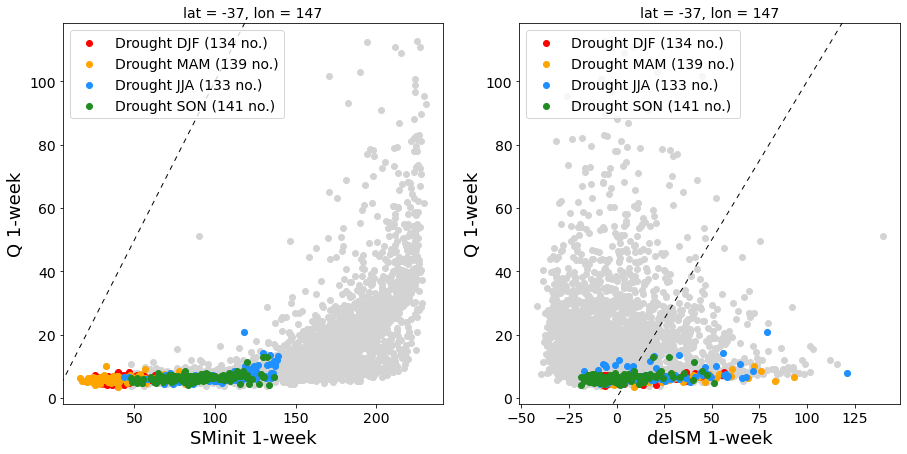

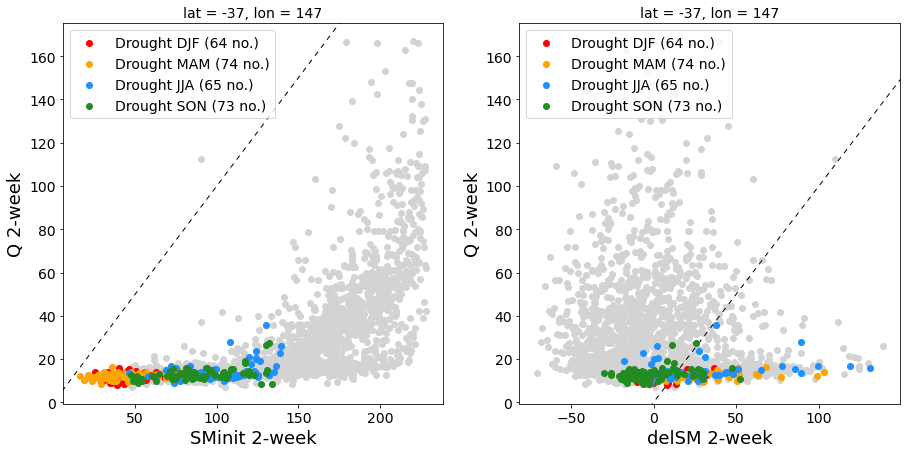

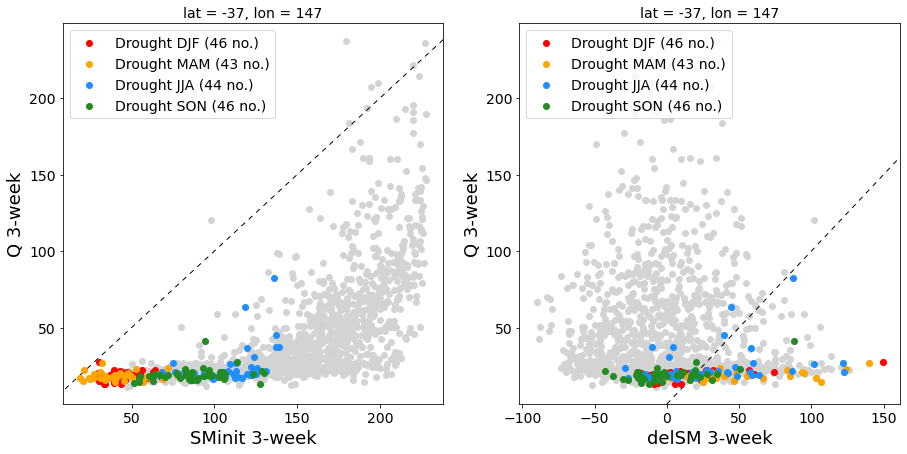

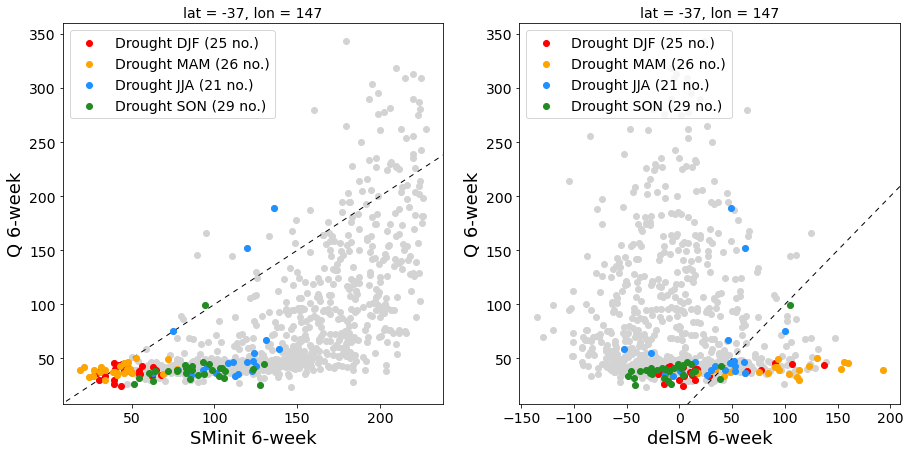

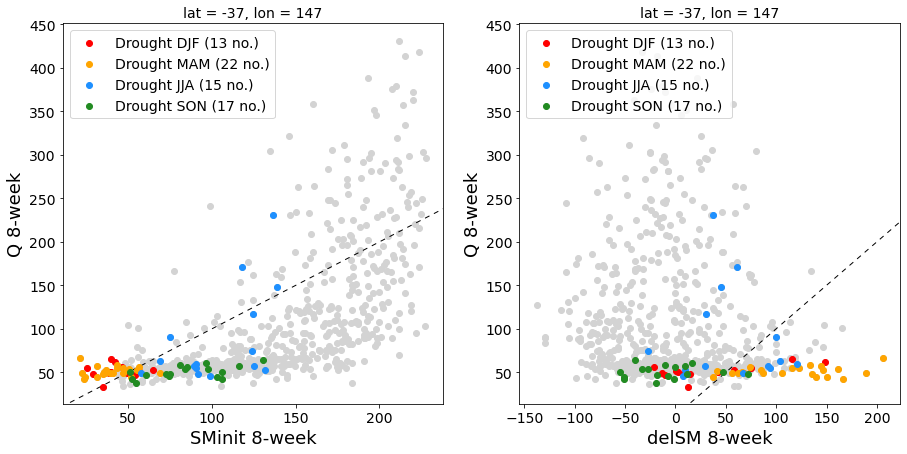

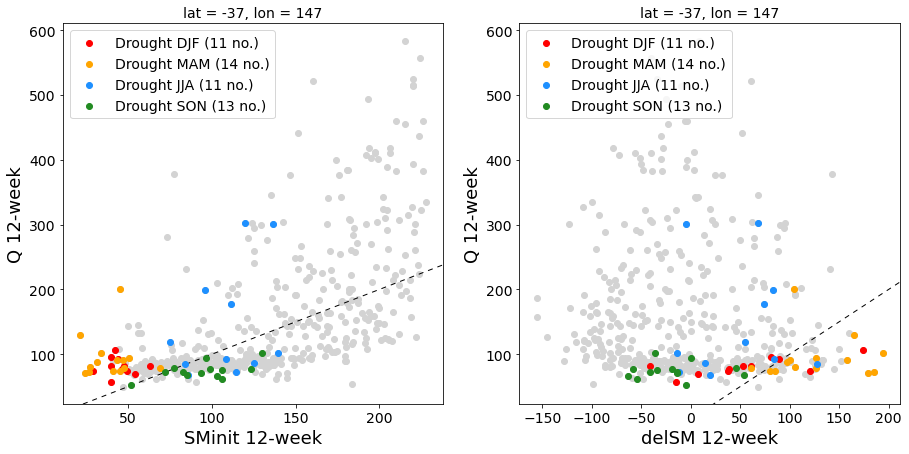

In [5]:
# Is it logical to include 'Q' in the analysis? Is there a relationship between initial soil moisture and Q in the data?
# No, there does not appear to be strong relationships between Q and initial soil moisture. So safe to use Q.

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

outdir = 'figures/SM_Q_scatter/'
#out_dir = '/g/data/w97/ad9701/p_prob_analysis/temp_files/sm_P_PminusE_eqns/'

########## Add more when calculated #########
multiweek = np.array([1, 2, 3, 6, 8, 12])
#############################################

fname_sm_init = 'sm_init_*_SEA_*.nc'
fname_sm_diff = 'sm_diff_*_SEA_*.nc'
fname_Q = 'Q_*_SEA_*.nc'

lat_pt = -37 #-37
lon_pt = 147 #148

def abline(slope, intercept, axes):
    """Plot a line from slope and intercept"""
    axes_xlim = axes.get_xlim()
    axes_ylim = axes.get_ylim()
    x_vals = np.append(np.append(np.array(axes_xlim[0]-500), np.array(axes.get_xlim())), np.array(axes_xlim[1]+500))
    y_vals = intercept + slope * x_vals
    axes.plot(x_vals, y_vals, linestyle=(0,(5,5)), color="black", linewidth=1)
    axes.set(xlim = axes_xlim, ylim = axes_ylim)
    
seas_names = ['DJF', 'MAM', 'JJA', 'SON']
seas_col = {'DJF':'red', 'MAM':'orange', 'JJA':'dodgerblue', 'SON':'forestgreen'}

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


for iW in multiweek:
    
    figname = 'lat' + str(lat_pt) + '_lon' + str(lon_pt) + '_SM_vs_Q_week' + str(iW) + '_droughtPts_bySeason.png'
    
    data_dir_Q = '/g/data/w97/ad9701/p_prob_analysis/temp_files/Q_week'+str(iW)+'/'
    ds_Q = xr.open_mfdataset(data_dir_Q + fname_Q, chunks = {'lat':400, 'lon':400}) #, combine='nested', concat_dim='time', chunks={'lat':1,'lon':1})
    
    data_dir_sm = '/g/data/w97/ad9701/p_prob_analysis/temp_files/sm_week'+str(iW)+'/'
    ds_sm_init = xr.open_mfdataset(data_dir_sm + fname_sm_init, chunks = {'lat':400, 'lon':400})
    ds_sm_diff = xr.open_mfdataset(data_dir_sm + fname_sm_diff, chunks = {'lat':400, 'lon':400})
    
    da_Q_pt_temp = ds_Q['qtot'].sel(lat = lat_pt, lon = lon_pt, method = "nearest").load()#.groupby('time.season')
    da_sm_init_pt_temp = ds_sm_init['sm'].sel(lat = lat_pt, lon = lon_pt, method = "nearest").load()#.groupby('time.season')
    da_sm_diff_pt_temp = ds_sm_diff['sm_diff'].sel(lat = lat_pt, lon = lon_pt, method = "nearest").load()#.groupby('time.season')    
    
    da_sm_init_pt = da_sm_init_pt_temp.groupby('time.season')
    da_sm_diff_pt = da_sm_diff_pt_temp.groupby('time.season')

    # reassigning the time dimension of Q to match sm exactly
    da_Q_pt = da_Q_pt_temp.assign_coords(time = da_sm_init_pt_temp.time).groupby('time.season')
    
    ds_sm_perc = xr.open_dataset('/g/data/w97/ad9701/p_prob_analysis/temp_files/sm_refPeriod_perc/sm_191101_to_202005_perc.nc')
    da_sm_10perc_pt = ds_sm_perc['sm'].sel(lat = lat_pt, lon = lon_pt, method = "nearest").sel(quantile = 0.1).load()
    
    # day of year is not properly assigned in the dataset of percentiles; reassigning
    dayofyear = np.arange(366)+1
    da_sm_perc10_pt = da_sm_10perc_pt.assign_coords(dayofyear = dayofyear)
    
    fig, axs = plt.subplots(1,2, figsize=(15, 7))
    axs = axs.flatten()

    colorSel = "lightgrey"
    colourDrght = "red"
    
    titleText = 'lat = ' + str(lat_pt) + ', lon = ' + str(lon_pt)
    xlab_list = ['SMinit ' + str(iW) + '-week', 'delSM ' + str(iW) + '-week']
    ylab_list = ['Q ' + str(iW) + '-week', 'Q ' + str(iW) + '-week']
    
    for iSeas in seas_names:
    
        # get the corresponding 10th perc thershold for each day in the init sm dataset
        da_sm_init_perc10_pt = da_sm_perc10_pt.sel(dayofyear = da_sm_init_pt[iSeas]['time.dayofyear'])

        # Is the relationship during drought conditions very different from the non-drought initial conditions?
        droughtInd = (da_sm_init_pt[iSeas]<=da_sm_init_perc10_pt).values
        nPts = droughtInd.sum()

        data_x = [da_sm_init_pt[iSeas], da_sm_diff_pt[iSeas]]
        data_y = [da_Q_pt[iSeas], da_Q_pt[iSeas]]

        for iX in np.arange(2):
            axs[iX].scatter(data_x[iX], data_y[iX], color = colorSel, marker = "o")
            axs[iX].scatter(data_x[iX][droughtInd], data_y[iX][droughtInd], color = seas_col[iSeas], label = "Drought "+iSeas+" ("+str(nPts)+" no.)", marker = "o", zorder=10) #, alpha =0.5) #, capsize = 5)
            
    for iX in np.arange(2):
        axs[iX].set(title = titleText, xlabel = xlab_list[iX], ylabel = ylab_list[iX])
        abline(1,0, axs[iX])
        
    for iX in np.arange(2):
        legend = axs[iX].legend(loc='upper left')
        
    plt.savefig(outdir+figname)


